In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import apyori
plt. rcParams["figure.figsize"] = (15, 10)

In [2]:
# Dataset de transações de compras feitas em um supermercado
mercado = pd.read_csv('./Market_Basket_Optimisation.csv', header=None)
mercado.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Limpeza no dataset para a remoção de espaços em branco no início e fim das strings em cada coluna
for index in mercado.columns:
 mercado[index] = mercado[index].str.strip()

In [4]:
# Pegando todos valores não nulos e ordenando em ordem alfabética
itens = mercado.melt()['value'].dropna().sort_values()
print (f'Existem {itens.nunique()} produtos distintos:\n', itens.unique())

Existem 119 produtos distintos:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffins'

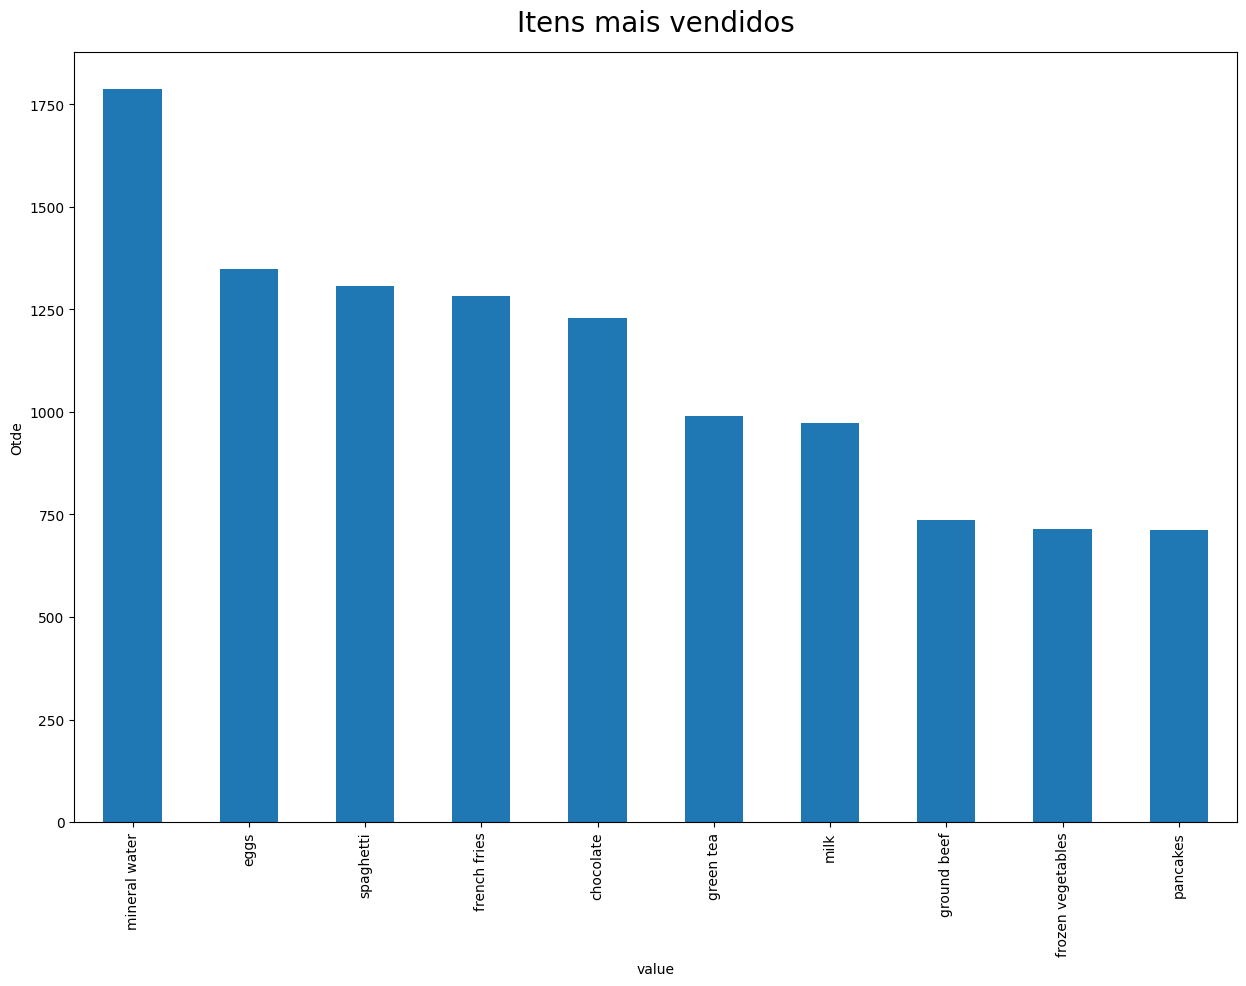

In [5]:
# Pegando itens mais vendidos
qtde_itens = itens.value_counts()
barra = qtde_itens.nlargest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Otde')
plt.show()

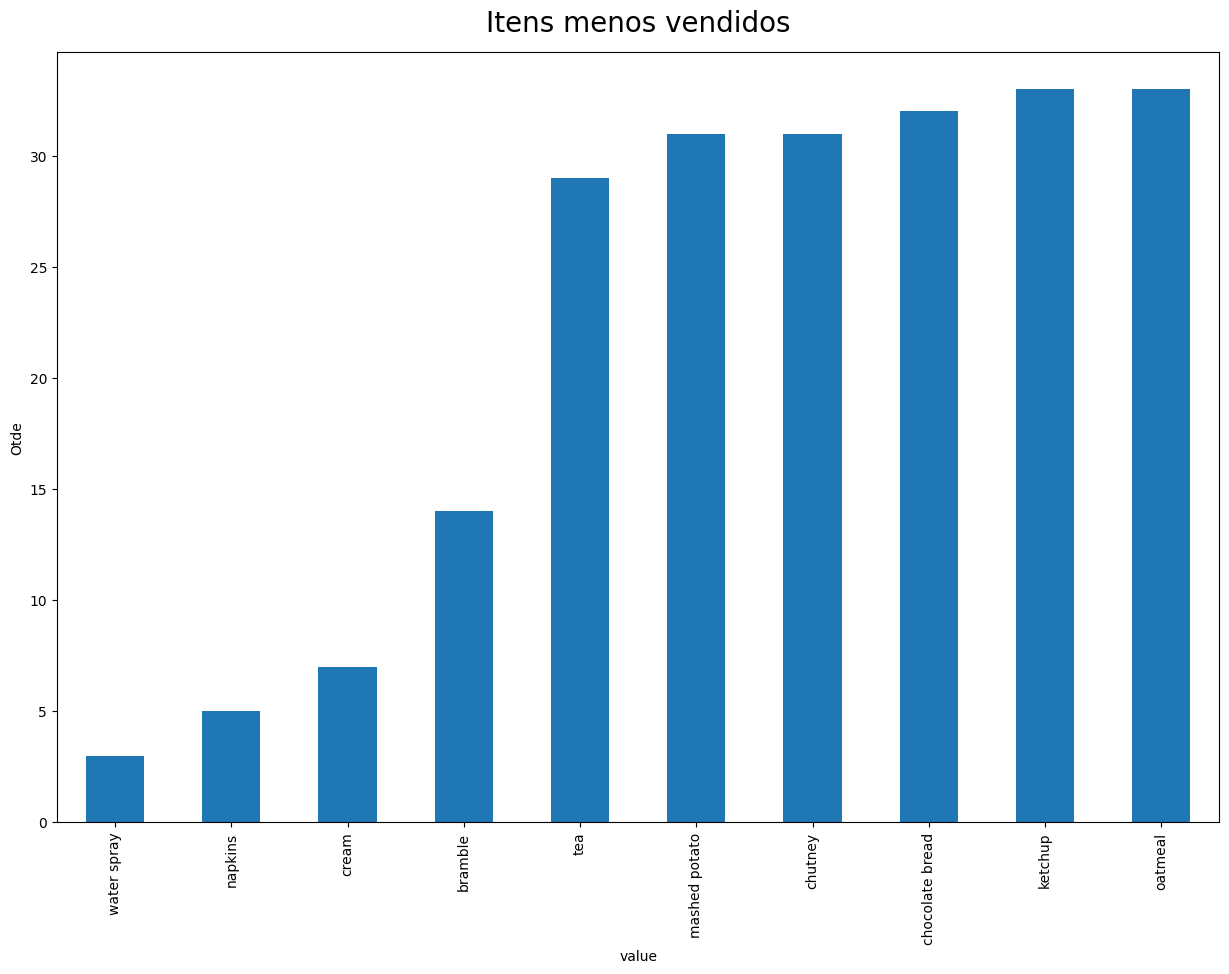

In [6]:
# Pegando itens menos vendidos
qtde_itens = itens.value_counts()
barra = qtde_itens.nsmallest(10).plot(kind='bar')
barra.set_title('Itens menos vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Otde')
plt.show()

In [7]:
# Removendo registros de transação que só tem um único produto. 
# Pois na associação precisamos de dois ou mais.
qtde_por_cesta = mercado.notna().apply(sum, axis=1)
cestas = [set(linha.dropna ()) for _, linha in mercado[qtde_por_cesta > 1].iterrows()]
cestas[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [8]:
# Minimo suporte de 4% pois a base é dispersa e tem pouca concentração dos mesmos produtos
minsup = 0.04
# Minima Confiança de 30%
minconf = 0.3

# Criando tabela vazia
colunas = ["Conjunto 1", "Conjunto 2", "Suporte", "Confiança"]
linhas = []

regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list (regra.items)
    suporte = regra.support
    confianca = regra.ordered_statistics[0].confidence

    nova_linha = {"Conjunto 1":[itens[-1]], "Conjunto 2":itens[:-1], "Suporte":suporte, "Confiança":confianca}
    linhas.append(nova_linha)

tabela = pd.DataFrame(linhas, columns = colunas)
tabela

,Conjunto 1,Conjunto 2,Suporte,Confiança
0,[chocolate],[mineral water],0.068732,0.341696
1,[mineral water],[eggs],0.066469,0.303657
2,[mineral water],[frozen vegetables],0.046633,0.385057
3,[mineral water],[ground beef],0.053419,0.428771
4,[spaghetti],[ground beef],0.051157,0.410615
5,[milk],[mineral water],0.062641,0.383387
6,[mineral water],[pancakes],0.044023,0.375371
7,[mineral water],[spaghetti],0.077954,0.357257
